In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sshtunnel import SSHTunnelForwarder
from sqlalchemy import create_engine
import sources.arbitrage as arbitrage
import sources.arbitrage_main as arbitrage_main
import numpy as np
import matplotlib.pyplot as plt
import sources.poisson as poisson

C:\Users\zdesi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
#%
#easy arbitrage example


arb = arbitrage.Arbitrage(engine, schemas=[], markets=[], bookmakers=[], moving_odds=False,
                             max_bet=1000)
points = 3
matrix_A = arbitrage_main.create_matrix_a(3.2,3.2,3.2,points)
matrix_A

,PosState,draw,home,away
0,0-0,2.2,-1.0,-1.0
1,1-0,-1.0,2.2,-1.0
2,2-0,-1.0,2.2,-1.0
3,3-0,-1.0,2.2,-1.0
4,0-1,-1.0,-1.0,2.2
5,1-1,2.2,-1.0,-1.0
6,2-1,-1.0,2.2,-1.0
7,3-1,-1.0,2.2,-1.0
8,0-2,-1.0,-1.0,2.2
9,1-2,-1.0,-1.0,2.2


Two approaches of creating linear program shown in form of table. Both program ran on the easiest for of arbitrage on 1x2 market(odds are home=3.2 draw = 3.2 away = 3.2).

In [5]:

_, x_w, z_w= arb.solve_maxprofit_gurobi(MatchID=None,matrix_A=matrix_A,weights=np.ones((points+1)**2))
_, x, z= arb.solve_maxprofit_gurobi(MatchID=None,matrix_A=matrix_A,weights=None)

Academic license - for non-commercial use only - expires 2023-11-03
Using license file C:\Users\zdesi\gurobi.lic


3200.0
3476.363636363638


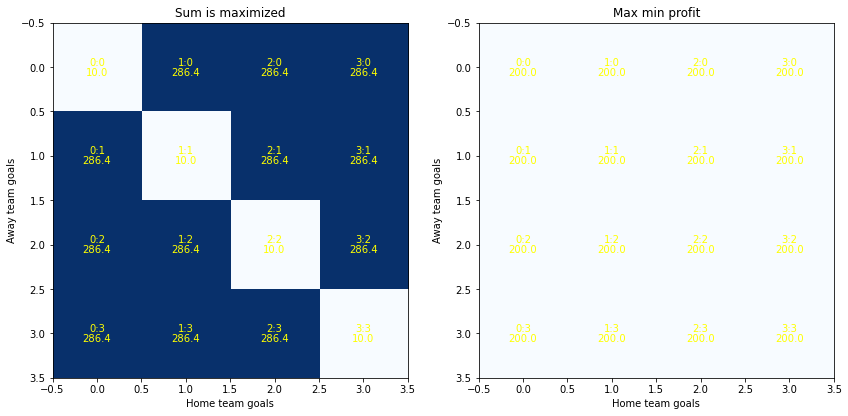

In [6]:
max_min=arbitrage_main.calculate_profit_easy_example(bets=x[:-1],odds=np.array([3.2,3.2,3.2]),points=points)
max_sum=arbitrage_main.calculate_profit_easy_example(bets=x_w,odds=np.array([3.2,3.2,3.2]),points=points)

print(max_min.sum())
print(max_sum.sum())

#plt.figure(figsize=(7, 7))
f,arrs=plt.subplots(1,2,figsize=(14, 14))
#N = np.zeros((points+1,points+1))
N = max_sum
arrs[0].imshow(N, cmap="Blues")
for i in range(points+1):
  for j in range(points+1):
    chstr =  str(j) + ":" + str(i)
    arrs[0].text(j, i, chstr, ha="center", va="bottom",color='yellow')
    arrs[0].text(j, i, round(N[i, j].item(),1), ha="center", va="top",color='yellow')
#arrs[0].axis("off")
arrs[0].set_xlabel('Home team goals')
arrs[0].set_ylabel('Away team goals')
arrs[0].set_title("Sum is maximized")
N = max_min
arrs[1].imshow(N, cmap="Blues")
for i in range(points+1):
  for j in range(points+1):
    chstr =  str(j) + ":" + str(i)
    arrs[1].text(j, i, chstr, ha="center", va="bottom",color='yellow')
    arrs[1].text(j, i, round(N[i, j].item(),1), ha="center", va="top",color='yellow')
arrs[1].set_xlabel('Home team goals')
arrs[1].set_ylabel('Away team goals')
arrs[1].set_title("Max min profit")

#arrs[1].axis("off")
plt.show()


When only up to two goals of each team results are considered both of these programs are equal

1800.0
1800.0


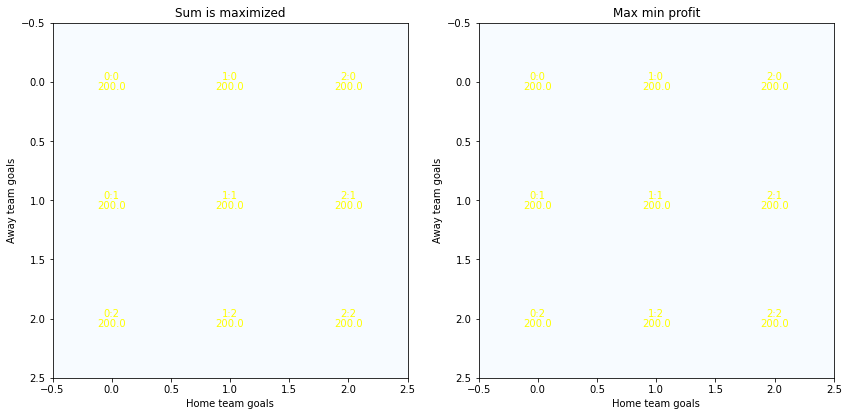

In [7]:
points = 2
matrix_A = arbitrage_main.create_matrix_a(3.2,3.2,3.2,points)
_, x_w, z_w= arb.solve_maxprofit_gurobi(MatchID=None,matrix_A=matrix_A,weights=np.ones((points+1)**2))
_, x, z= arb.solve_maxprofit_gurobi(MatchID=None,matrix_A=matrix_A,weights=None)
max_min=arbitrage_main.calculate_profit_easy_example(bets=x[:-1],odds=np.array([3.2,3.2,3.2]),points=points)
max_sum=arbitrage_main.calculate_profit_easy_example(bets=x_w,odds=np.array([3.2,3.2,3.2]),points=points)

print(max_min.sum())
print(max_sum.sum())

#plt.figure(figsize=(7, 7))
f,arrs=plt.subplots(1,2,figsize=(14, 14))
#N = np.zeros((points+1,points+1))
N = max_sum
arrs[0].imshow(N, cmap="Blues")
for i in range(points+1):
  for j in range(points+1):
    chstr =  str(j) + ":" + str(i)
    arrs[0].text(j, i, chstr, ha="center", va="bottom",color='yellow')
    arrs[0].text(j, i, round(N[i, j].item(),1), ha="center", va="top",color='yellow')
#arrs[0].axis("off")
arrs[0].set_xlabel('Home team goals')
arrs[0].set_ylabel('Away team goals')
arrs[0].set_title("Sum is maximized")
N = max_min
arrs[1].imshow(N, cmap="Blues")
for i in range(points+1):
  for j in range(points+1):
    chstr =  str(j) + ":" + str(i)
    arrs[1].text(j, i, chstr, ha="center", va="bottom",color='yellow')
    arrs[1].text(j, i, round(N[i, j].item(),1), ha="center", va="top",color='yellow')
arrs[1].set_xlabel('Home team goals')
arrs[1].set_ylabel('Away team goals')
arrs[1].set_title("Max min profit")

#arrs[1].axis("off")
plt.show()

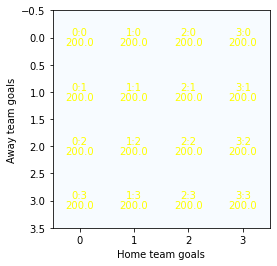

In [8]:
#transform max sum to min max
points = 3
all_results = (points+1)**2
draw_results = points + 1
home_results = (all_results - draw_results)/2
away_win =  (all_results-draw_results)/2
weights = np.ones((points+1)**2)
matrix_A = arbitrage_main.create_matrix_a(3.2,3.2,3.2,points)
possible_results = np.array([j-i for i in range(points+1) for j in range(points+1)],dtype=float)
possible_results[possible_results!=0]=1
possible_results[possible_results==0]=home_results/draw_results
_,x,z=arb.solve_maxprofit_gurobi(matrix_A=matrix_A,MatchID=None,weights=possible_results)
max_sum_transformed=arbitrage_main.calculate_profit_easy_example(bets=x,odds=np.array([3.2,3.2,3.2]),points=points)

N = max_sum_transformed
plt.imshow(N, cmap="Blues")
for i in range(points+1):
  for j in range(points+1):
    chstr =  str(j) + ":" + str(i)
    plt.text(j, i, chstr, ha="center", va="bottom",color='yellow')
    plt.text(j, i, round(N[i, j].item(),1), ha="center", va="top",color='yellow')
#arrs[0].axis("off")
plt.ylabel('Away team goals')
plt.xlabel('Home team goals')
plt.show()


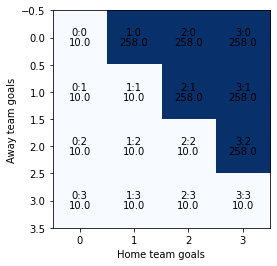

In [9]:


points = 3
all_results = (points+1)**2
draw_results = points + 1
home_results = (all_results - draw_results)/2
away_win =  (all_results-draw_results)/2
weights = np.ones((points+1)**2)
matrix_A = arbitrage_main.create_matrix_a(3.2,3.2,2.9,points)
lambda_h = 1.5
lambda_a = 1
k=poisson.poisson(lambda_h=lambda_h,lambda_a=lambda_a,points=points+1)
_,x,z = arb.solve_maxprofit_gurobi(matrix_A=matrix_A,weights=k)
max_sum_transformed=arbitrage_main.calculate_profit_easy_example(bets=x,odds=np.array([3.2,3.2,2.9]),points=points)

N = max_sum_transformed
plt.imshow(N, cmap="Blues")
for i in range(points+1):
  for j in range(points+1):
    chstr =  str(j) + ":" + str(i)
    plt.text(j, i, chstr, ha="center", va="bottom")
    plt.text(j, i, round(N[i, j].item(),1), ha="center", va="top")
#arrs[0].axis("off")
plt.ylabel('Away team goals')
plt.xlabel('Home team goals')
#minimalizovat varianci pro ruzne vysledky ex - gamma*v
#modern portfolio theory
plt.show()


In [21]:
# 3 cases:
#Real lambdas
points = 3
real_lambda_h = 1.5
real_lambda_a = 1

a,b = arbitrage_main.simple_test_real_probs(lambda_a_book=real_lambda_a+0.5,lambda_h_book=real_lambda_h-0.5,
                                            lambda_a_model=real_lambda_a,lambda_h_model=real_lambda_h,
                                            real_lambda_a=real_lambda_a,real_lambda_h=real_lambda_h,
                                            arb=arb,threshold=0)
print(a,b)

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [11]:
a,b = arbitrage_main.simple_test_real_probs(lambda_a_book=1,lambda_h_book=2,
                                            lambda_a_model=1,lambda_h_model=2,
                                            real_lambda_a=real_lambda_a ,real_lambda_h=real_lambda_h,
                                            arb=arb)

[ -3551.241539   -10422.449935    -3044.62054764]


TypeError: 'NoneType' object is not subscriptable

In [12]:
a,b = arbitrage_main.simple_test_real_probs(lambda_a_book=real_lambda_a-0.2,lambda_h_book=real_lambda_h+0.2,
                                            lambda_a_model=real_lambda_a,lambda_h_model=real_lambda_h,
                                            real_lambda_a=real_lambda_a,real_lambda_h=real_lambda_h,
                                            arb=arb)

None


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [ ]:
#sharpe ratio no beta
#rating system podle historických odds

In [13]:

res = arbitrage_main.simple_test_real_probs(lambda_a_book=3,lambda_h_book=1,
                                            lambda_a_model=real_lambda_a,lambda_h_model=real_lambda_h,
                                            real_lambda_a=real_lambda_a,real_lambda_h=real_lambda_h,
                                            arb=arb,points=10,threshold=0)
print("When only true arbitrages are considered difference between true distribution and bookmaker one is irrelevant."
      "This is result when bookmaker lambdas are 5 for away team and 1 for home team when true lambdas are 1 for away and 1.5 for home:"
      " profit is {k}.".format(k=res))


None


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

Allowing negative results is not enough to achieve any profit when bookmaker odds are "real odds"


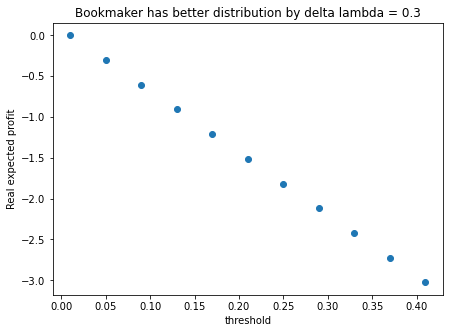

In [50]:
cm = 1/2.54
x=[]
y=[]
for i in np.linspace(0.01,0.41,num=11):
    res,res_basic,x_basic,x_weighted = arbitrage_main.simple_test_real_probs(lambda_a_book=real_lambda_a,lambda_h_book=real_lambda_h,
                                            lambda_a_model=real_lambda_a+0.3,lambda_h_model=real_lambda_h-0.3,
                                            real_lambda_a=real_lambda_a,real_lambda_h=real_lambda_h,
                                            arb=arb,points=10,threshold=i)
    y.append(res)
    x.append(i)
y = np.array(y)
#print(x)
plt.subplots(figsize=(7,5))
plt.scatter(x=x,y=y)
plt.xlabel('threshold')
plt.title('Bookmaker has better distribution by delta lambda = 0.3')
#plt.ylim(0,0.0)
plt.ylabel('Real expected profit')
#plt.show()
plt.savefig('bookmaker_better.png')
print("Allowing negative results is not enough to achieve any profit when bookmaker odds are \"real odds\"")


Allowing negative results is not enough to achieve any profit when bookmaker odds are "real odds"


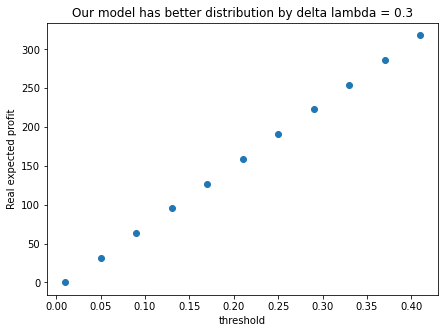

In [51]:
cm = 1/2.54
x=[]
y=[]
for i in np.linspace(0.01,0.41,num=11):
    res,res_basic,x_basic,x_weighted = arbitrage_main.simple_test_real_probs(lambda_a_book=real_lambda_a+0.3,lambda_h_book=real_lambda_h-0.3,
                                            lambda_a_model=real_lambda_a,lambda_h_model=real_lambda_h,
                                            real_lambda_a=real_lambda_a,real_lambda_h=real_lambda_h,
                                            arb=arb,points=10,threshold=i)
    y.append(res)
    x.append(i)
y = np.array(y)
#print(x)
plt.subplots(figsize=(7,5))
plt.scatter(x=x,y=y)
plt.xlabel('threshold')
plt.title('Our model has better distribution by delta lambda = 0.3')
#plt.ylim(0,0.0)
plt.ylabel('Real expected profit')
#plt.show()
plt.savefig('model_better.png')
print("Allowing negative results is not enough to achieve any profit when bookmaker odds are \"real odds\"")

# real,model,bookmaker 1x2,bookmaker ou, bookmaker ah
# bookmaker odds different lambdas

In [16]:

x = []
y = []
for i in np.linspace(0.1, 1, num=20):
    res = arbitrage_main.simple_test_real_probs(lambda_a_book=real_lambda_a, lambda_h_book=real_lambda_h,
                                                lambda_a_model=real_lambda_a+i, lambda_h_model=real_lambda_h-i,
                                                real_lambda_a=real_lambda_a, real_lambda_h=real_lambda_h,
                                                arb=arb, points=10, threshold=2)
    y.append(res)
    x.append(i)
plt.scatter(x=x, y=y)
plt.xlabel('Lambda change of mdeol propabilities')
plt.title('When bookmaker odds start to be skewed most extreme example')
plt.ylabel('Profit')
plt.show()
print("When model odds are skewed profits are negative")

[ 990.    0. 1000.]


TypeError: 'NoneType' object is not subscriptable

In [17]:
x=[]
y=[]
for i in np.linspace(0.1,1,num=20):
    res = arbitrage_main.simple_test_real_probs(lambda_a_book=real_lambda_a+i,lambda_h_book=real_lambda_h-i,
                                            lambda_a_model=real_lambda_a,lambda_h_model=real_lambda_h,
                                            real_lambda_a=real_lambda_a,real_lambda_h=real_lambda_h,
                                            arb=arb,points=5,threshold=0.1)
    y.append(res)
    x.append(i)
plt.scatter(x=x,y=y)
plt.xlabel('Lambda change of bookmaker propabilities')
plt.title('When bookmaker odds start to be skewed mild example')
plt.ylabel('Profit')
#plt.ylim(0)
plt.show()
print("Allowing negative results is not enough to achieve any profit when bookmaker odds are \"real odds\"")


[ 0. 90.  0.]


TypeError: 'NoneType' object is not subscriptable

In [18]:
x = []
y = []
for i in np.linspace(0.1, 0.2, num=10):
    res = arbitrage_main.simple_test_real_probs(lambda_a_book=real_lambda_a, lambda_h_book=real_lambda_h,
                                                lambda_a_model=real_lambda_a+i, lambda_h_model=real_lambda_h-i,
                                                real_lambda_a=real_lambda_a, real_lambda_h=real_lambda_h,
                                                arb=arb, points=10, threshold=0.1)
    y.append(res)
    x.append(i)
plt.scatter(x=x, y=y)
plt.xlabel('Lambda change of model propabilities')
plt.title('When bookmaker odds start to be skewed most extreme example')
plt.ylabel('Profit')
plt.show()
print("When model odds are skewed profits are negative")

[ 0.  0. 90.]


TypeError: 'NoneType' object is not subscriptable